In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('2021.csv')

df['TopQB'] = np.where((df['FantPos'] == 'QB') & (df['PosRank'] < 16), 1, 0)
df['TopWR'] = np.where((df['FantPos'] == 'WR') & (df['PosRank'] < 16), 1, 0)
df['TopRB'] = np.where((df['FantPos'] == 'RB') & (df['PosRank'] < 16), 1, 0)
df['PPG'] = df.apply(lambda x: round(x.FantPt / x.G,2), axis = 1)
df['PPG_PPR'] = df.apply(lambda x: round(x.PPR / x.G,2), axis = 1)

top_players = df[(df['TopQB'] == 1) | (df['TopWR'] == 1) | (df['TopRB'] == 1)]
list(top_players.groupby('FantPos'))

[('QB',
      Rk           Player   Tm FantPos  Age   G  GS  Cmp  PsAtt  PsYds  ...  \
  3    4        JoshAllen  BUF      QB   25  17  17  409    646   4407  ...   
  5    6    JustinHerbert  LAC      QB   23  17  17  443    672   5014  ...   
  6    7         TomBrady  TAM      QB   44  17  17  485    719   5316  ...   
  12  13   PatrickMahomes  KAN      QB   26  17  17  436    658   4839  ...   
  17  18     AaronRodgers  GNB      QB   38  16  16  366    531   4115  ...   
  19  20  MatthewStafford  LAR      QB   33  17  17  404    601   4886  ...   
  22  23      DakPrescott  DAL      QB   28  16  16  410    596   4449  ...   
  28  29        JoeBurrow  CIN      QB   25  16  16  366    520   4611  ...   
  30  31       JalenHurts  PHI      QB   23  15  15  265    432   3144  ...   
  39  40      KylerMurray  ARI      QB   24  14  14  333    481   3787  ...   
  40  41      KirkCousins  MIN      QB   33  16  16  372    561   4221  ...   
  75  78    RyanTannehill  TEN      QB   33 

In [141]:
df.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,PsAtt,PsYds,...,FantPt,PPR,PosRank,OvRank,TopQB,TopWR,TopRB,PPG,PPG_PPR,%
0,1,JonathanTaylor,IND,RB,22,17,17,0,0,0,...,333,373.1,1,1,0,0,1,19.59,21.95,352.836240
1,2,CooperKupp,LAR,WR,28,17,17,0,1,0,...,295,439.5,1,2,0,1,0,17.35,25.85,293.383333
2,3,DeeboSamuel,SFO,WR,25,16,15,1,2,24,...,262,339.0,2,3,0,1,0,16.38,21.19,293.383333
3,4,JoshAllen,BUF,QB,25,17,17,409,646,4407,...,403,402.6,1,4,1,0,0,23.71,23.68,382.466051
4,5,AustinEkeler,LAC,RB,26,16,16,0,0,0,...,274,343.8,2,5,0,0,1,17.12,21.49,352.836240


<AxesSubplot:>

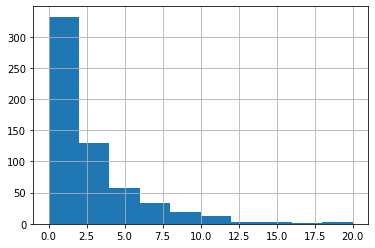

In [3]:
df.TotTD.hist()

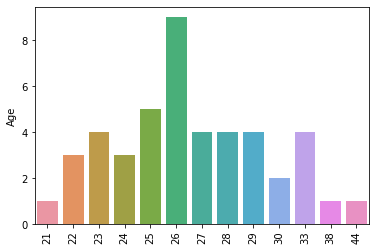

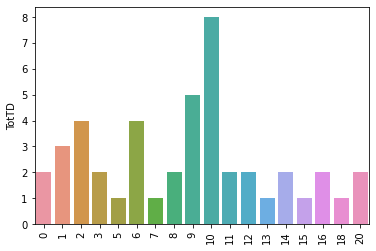

In [119]:
cat_values = top_players[['Age','TotTD']]
for i in cat_values:
    num = cat_values[i].value_counts()
    chart = sns.barplot(x=num.index,y=num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [135]:
df.groupby('FantPos').FantPt.describe()

,count,mean,std,min,25%,50%,75%,max
FantPos,,,,,,,,
QB,83.0,110.903614,121.928069,-3.0,8.00,51.0,210.50,403.0
RB,168.0,59.392857,66.291141,-2.0,7.75,33.5,91.75,333.0
TE,118.0,34.093220,38.692959,0.0,4.25,20.5,42.50,194.0
WR,227.0,52.863436,56.071887,-4.0,7.50,36.0,78.00,295.0


<AxesSubplot:xlabel='FantPos', ylabel='FantPt'>

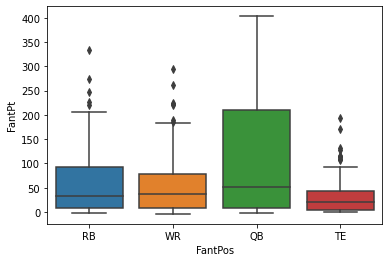

In [142]:
sns.boxplot(x='FantPos',y='FantPt', data = df)

In [146]:
corr = df.corr()
corr

,Rk,Age,G,GS,Cmp,PsAtt,PsYds,PsTD,Int,RsAtt,...,FantPt,PPR,PosRank,OvRank,TopQB,TopWR,TopRB,PPG,PPG_PPR,%
Rk,1.000000,-0.064421,-0.573896,-0.754183,-0.326358,-0.327107,-0.328016,-0.318050,-0.306136,-0.469467,...,-0.830010,-0.881972,0.807632,-0.464688,-0.242050,-0.255949,-0.251882,-0.807953,-0.874765,0.112557
Age,-0.064421,1.000000,-0.006657,0.112826,0.205716,0.200224,0.202339,0.224699,0.135589,-0.097780,...,0.085736,0.057120,-0.134157,-0.033773,0.174012,-0.010856,-0.033560,0.132810,0.101660,0.073778
G,-0.573896,-0.006657,1.000000,0.573092,0.138440,0.134834,0.141790,0.143720,0.107661,0.206463,...,0.467741,0.533156,-0.434484,0.263150,0.150213,0.158619,0.106083,0.235242,0.299279,0.117198
GS,-0.754183,0.112826,0.573092,1.000000,0.383608,0.382708,0.385451,0.372280,0.354403,0.281387,...,0.766349,0.817294,-0.688107,0.425906,0.306691,0.282058,0.232793,0.655702,0.722057,0.103410
Cmp,-0.326358,0.205716,0.138440,0.383608,1.000000,0.998647,0.997335,0.962542,0.939991,0.115104,...,0.641906,0.472983,-0.302905,0.077947,0.751291,-0.042396,-0.042536,0.616013,0.458105,-0.067179
PsAtt,-0.327107,0.200224,0.134834,0.382708,0.998647,1.000000,0.995118,0.955606,0.947570,0.117144,...,0.638871,0.469752,-0.304833,0.073141,0.739409,-0.042657,-0.043025,0.616298,0.457518,-0.068093
PsYds,-0.328016,0.202339,0.141790,0.385451,0.997335,0.995118,1.000000,0.970848,0.938290,0.117176,...,0.648422,0.479121,-0.302587,0.082243,0.772211,-0.041767,-0.042404,0.620236,0.462526,-0.066900
PsTD,-0.318050,0.224699,0.143720,0.372280,0.962542,0.955606,0.970848,1.000000,0.865519,0.108724,...,0.653103,0.487398,-0.289012,0.095347,0.841486,-0.037591,-0.037591,0.617454,0.465308,-0.062158
Int,-0.306136,0.135589,0.107661,0.354403,0.939991,0.947570,0.938290,0.865519,1.000000,0.121328,...,0.582671,0.422302,-0.296344,0.058213,0.616751,-0.043801,-0.043801,0.572290,0.418979,-0.068646
RsAtt,-0.469467,-0.097780,0.206463,0.281387,0.115104,0.117144,0.117176,0.108724,0.121328,1.000000,...,0.524442,0.471092,-0.393806,0.314450,0.106016,-0.052841,0.636154,0.519320,0.475135,-0.171040
